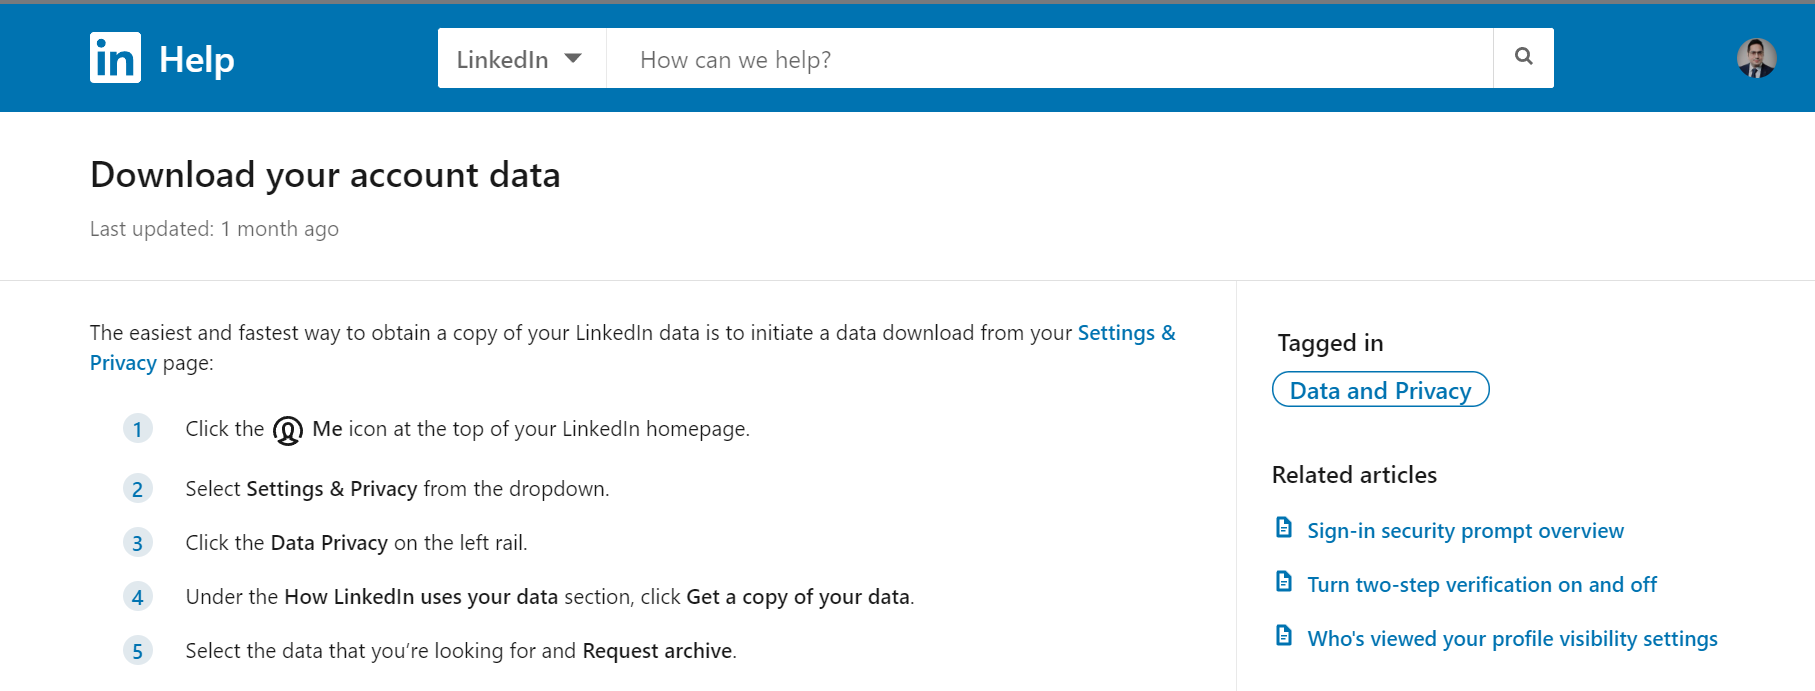

In [110]:
from IPython import display
display.Image("C:/Users/Zohaib/OneDrive/Desktop/Projects/LinkedIn Data Analysis Project\Screenshot 2023-09-08 013330.png")

# **Importing Libraries**

In [123]:
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

# **Downloading the data to analyze**.


I am analyzing my connections data. Feel free to also analyze anythng else that you are curious about.

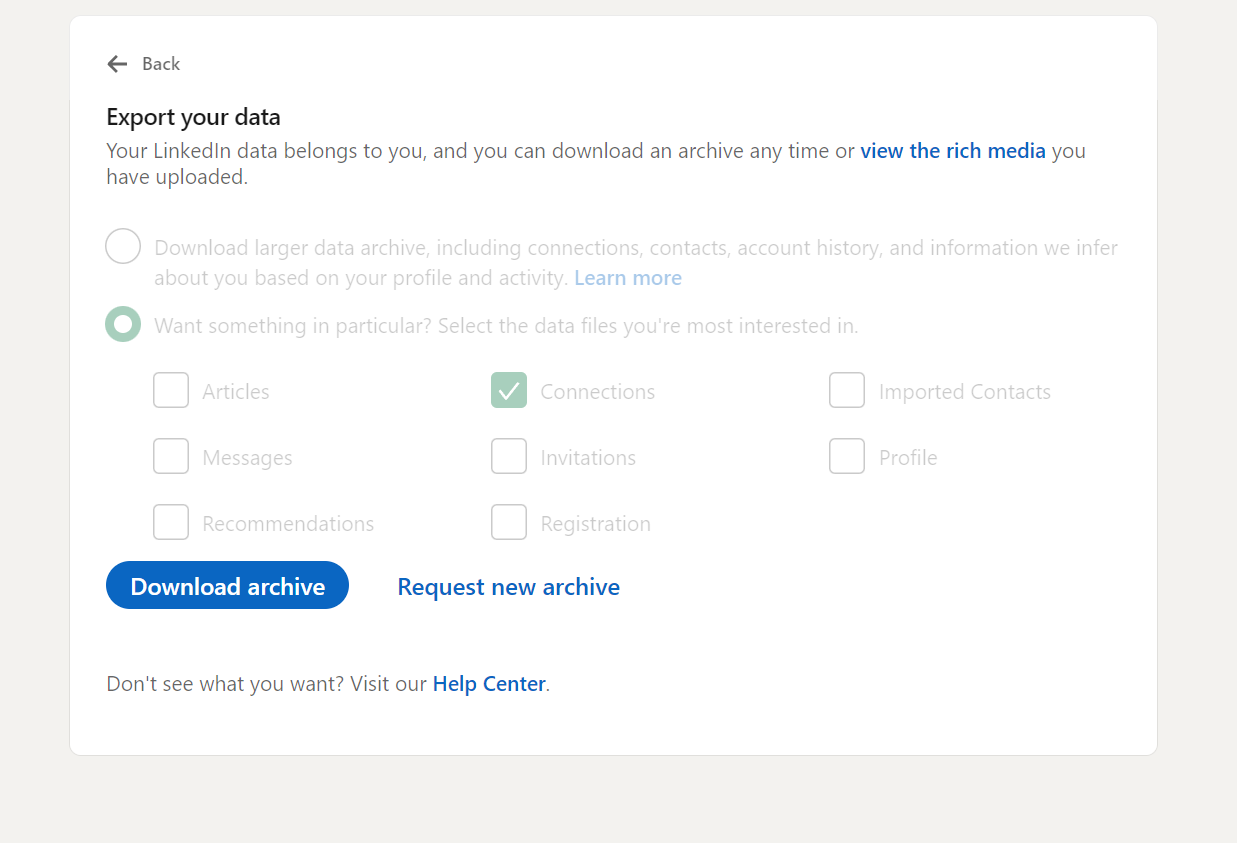

In [112]:
display.Image("C:/Users/Zohaib/OneDrive/Desktop/Projects/LinkedIn Data Analysis Project/Screenshot 2023-09-08 101001.png")

# **Loading Dataset**

In [113]:
df=pd.read_csv('/Users/Zohaib/OneDrive/Desktop/Projects/LinkedIn Data Analysis Project/Connections.csv')
df.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Abongnwen,Abianui,https://www.linkedin.com/in/abongnwen-abianui-...,NaN,AstraZeneca,Global Study Manager Oncology,7-Sep-23
1,Vishal,Sood,https://www.linkedin.com/in/vishal-k-sood,NaN,Canada Border Services Agency | Agence des ser...,Data Scientist,7-Sep-23
2,Christopher,Cooke,https://www.linkedin.com/in/christopher-cooke-...,NaN,Prodigy Education,Data Scientist,7-Sep-23
3,Jamey,"Martell, BSc(Hon), MHI, CHCIO, PMP, CPHIMS-CA",https://www.linkedin.com/in/jamey-martell,NaN,Nova Scotia Health Authority,"Senior Director, One Person One Record",7-Sep-23
4,Aude,OUVRIER-BUFFET,https://www.linkedin.com/in/aude-ouvrier-buffe...,NaN,Laboratory « Chemistry of Novel Materials »,Research assistant,7-Sep-23


In [114]:
df.shape

(1500, 7)

# **Timeline**: How is my Connection activity overtime?

In [ ]:
fig.show("png")

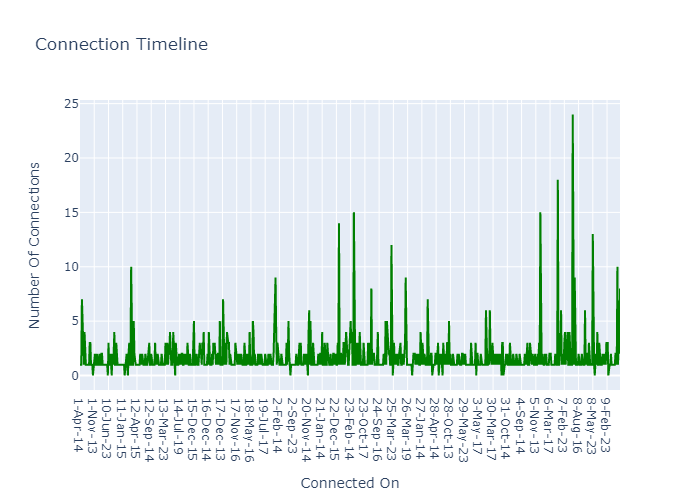

In [129]:
fig = px.line(df.groupby(by='Connected On').count().reset_index(), 
              x="Connected On", 
              y="First Name", 
              labels={'First Name': 'Number Of Connections'},
              title='Connection Timeline')
fig.update_traces(line=dict(color='green'))

fig.show("png")


# **Companies**: Where do my Connections work?

In [116]:
group_company = df['Company'].value_counts().reset_index()
group_company.columns = ['Company', 'Count']
group_company = group_company.sort_values(by='Count', ascending=False)

print(group_company)


                                         Company  Count
0                                    AstraZeneca     29
1                                         Pfizer     25
2                                            RBC     21
3                                          Roche     18
4    Tabuk Pharmaceuticals Manufacturing Company     17
..                                           ...    ...
408                         Paxal Pharmaceutical      1
409                    Babylon Urban Development      1
410                                      Getinge      1
411                                   Raej Saudi      1
969                          Snowy Hydro Limited      1

[970 rows x 2 columns]


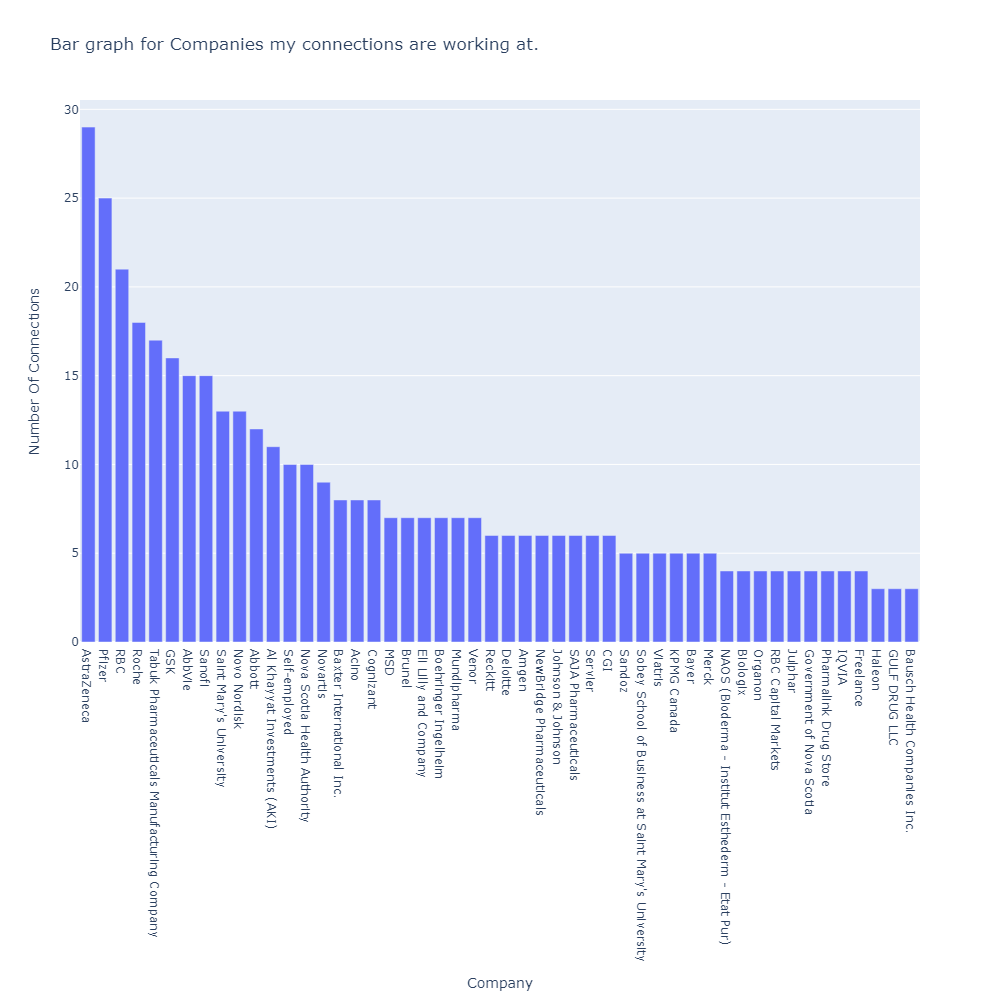

In [130]:
fig = px.bar(group_company[:50],
             x='Company',  # Use 'Company' for the x-axis
             y='Count',    # Use 'Count' for the y-axis
             labels={'Count': 'Number Of Connections'}, 
             width=1000, height=1000,
             title='Bar graph for Companies my connections are working at.')

fig.show("png")


#### ***Pharmaceutical companies are top in the line as my career begun with pharmaceuticals and then I switched to healthcare and IT***.

# Let's use **Tree Plot** to have a better visualisation.

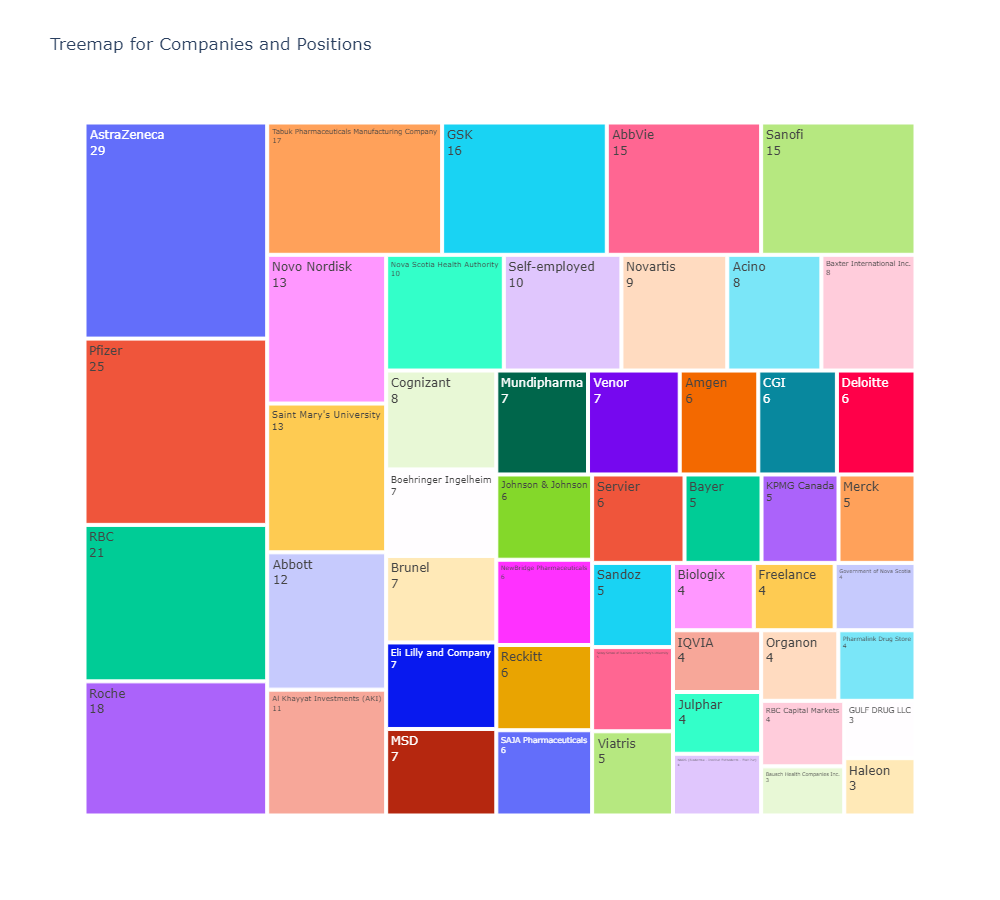

In [131]:
fig = px.treemap(group_company[:50], 
                 path=['Company'],  # Use 'Company' as the first level
                 values='Count',     # Use 'Count' as the values
                 labels={'Count': 'Number Of Connections'},
                 width=1000, height=900,
                 title='Treemap for Companies and Positions')

fig.update_traces(textinfo="label+value")

fig.show("png")


# **Treemap** gives us a better view. The size of each ***company box*** represents the size of the connections working at that particular company.

You can hover on the ***boxes*** to have a better view pf the individual companies and the number of connections working there.

# **Positions**: Which Positions do my connections hold?

In [119]:
df['Position'].value_counts()

Product Specialist                                      19
Medical Science Liaison                                 18
Managing Director                                       17
Data Scientist                                          16
Key Account Manager                                     16
                                                        ..
Gastroenterology | Respiratory Product Specialist        1
Digital Entrepreneur & A Pharmacist                      1
Saudi Saudi Arabia                                       1
ICU/ Internal medicine registrar                         1
Consulting Manager | Digital & Emerging Technologies     1
Name: Position, Length: 1097, dtype: int64

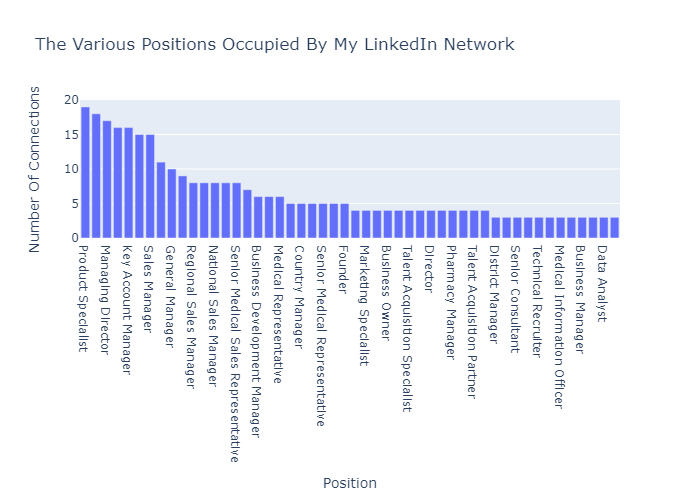

In [132]:
fig = px.bar(df.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:50].reset_index(),
       x='Position',
       y='Connected On',
       labels={'Connected On': 'Number Of Connections'},
       title= 'The Various Positions Occupied By My LinkedIn Network')

fig.show("png")

# **WordCloud** Visualisation

In [121]:
def CreateWordCloud(text):
    
    
    wordcloud = WordCloud(width = 1000, height = 900, 
                background_color='black',
                min_font_size = 10,
                colormap='Set2').generate(text) 
    
    
    fig = plt.figure(figsize = (15, 10)) 
    plt.imshow(wordcloud, interpolation='bilinear') 

    plt.show() 
    
    return fig

In [122]:
positions = ' '.join(df[~df.Position.isnull()].Position.unique())

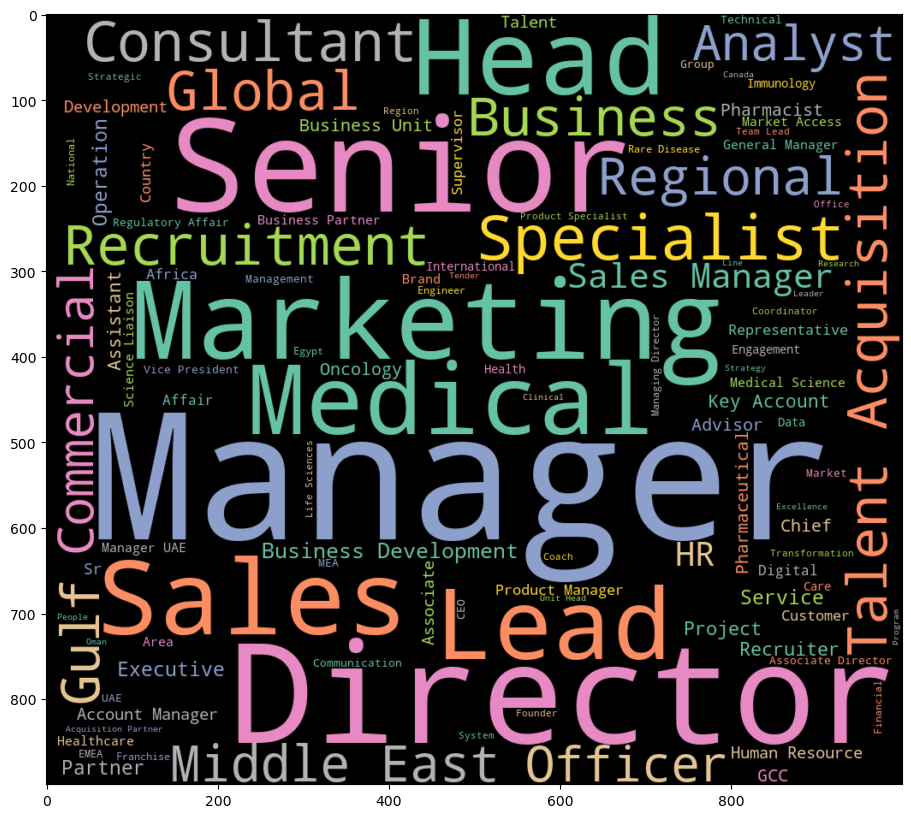

In [98]:
wordcloud = CreateWordCloud(positions)

# **Conclusion**:

I have used **Connections** data and analyse it and drawn some insights from it.

Same methodology can be used for any different type of Linkedin data to perform similar analysis.